In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



#Importing Data


In [108]:
data = pd.read_csv("/content/drive/MyDrive/IntelliHackDatasets/Q1/weather_data.csv")

data.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [109]:
data.tail()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
306,2023-11-03,22.072834,37.756910,4.729355,No Rain,27.307081,954.564875
307,2023-11-04,19.645885,42.190604,8.092369,No Rain,51.807877,964.002410
308,2023-11-05,23.884496,36.205508,11.860847,Rain,29.872557,977.681431
309,2023-11-06,18.168418,34.785000,4.781288,No Rain,94.067925,1047.153269
310,2023-11-07,19.389714,37.717416,9.388371,No Rain,25.929676,983.134701


#Data preprocess

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             311 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      311 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         311 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.1+ KB


##identify null values

In [111]:
(data.isnull().sum(axis=0)*100)/data.shape[0]

,0
date,0.000000
avg_temperature,4.823151
humidity,4.823151
avg_wind_speed,4.823151
rain_or_not,0.000000
cloud_cover,4.823151
pressure,0.000000


In [112]:
data[data.isnull().any(axis=1)]

#as we can see all rows that appear null values missing same fields
#it can be data collection issue


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
12,2023-01-13,NaN,NaN,NaN,No Rain,NaN,1022.950823
15,2023-01-16,NaN,NaN,NaN,Rain,NaN,1011.022515
16,2023-01-17,NaN,NaN,NaN,No Rain,NaN,963.535408
44,2023-02-14,NaN,NaN,NaN,Rain,NaN,1006.016818
47,2023-02-17,NaN,NaN,NaN,Rain,NaN,991.879332
52,2023-02-22,NaN,NaN,NaN,No Rain,NaN,1015.417460
57,2023-02-27,NaN,NaN,NaN,Rain,NaN,1010.852727
71,2023-03-13,NaN,NaN,NaN,No Rain,NaN,1004.353822
111,2023-04-22,NaN,NaN,NaN,Rain,NaN,1032.210316
114,2023-04-25,NaN,NaN,NaN,Rain,NaN,1046.447665


Above is the rows which contain null values

##drop null values

In [113]:
#dropping  rows which have null values
data_cleaned_null=data.dropna()

In [114]:
data_cleaned_null[data_cleaned_null.isnull().any(axis=1)]


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure


##identify duplicated values

In [115]:
data_cleaned_null[data_cleaned_null.duplicated()]


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure


##identify garbage values

In [116]:
data_cleaned_null.info()


<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             296 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      296 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         296 non-null    float64
dtypes: float64(5), object(2)
memory usage: 18.5+ KB


In [117]:
data_cleaned_null["rain_or_not"].unique()

array(['Rain', 'No Rain'], dtype=object)

In [118]:
data_cleaned_null["rain_or_not"] = data_cleaned_null["rain_or_not"].replace({'Rain': 1, 'No Rain': 0})

data_cleaned_null["rain_or_not"].unique()

<ipython-input-118-19df0e383585>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned_null["rain_or_not"] = data_cleaned_null["rain_or_not"].replace({'Rain': 1, 'No Rain': 0})
<ipython-input-118-19df0e383585>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_null["rain_or_not"] = data_cleaned_null["rain_or_not"].replace({'Rain': 1, 'No Rain': 0})


array([1, 0])

In [119]:
data_cleaned_null[[c for c in data_cleaned_null if c not in ["rain_or_not"]]
       + ["rain_or_not"]]

,date,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure,rain_or_not
0,2023-01-01,23.745401,46.140905,7.845981,20.851051,992.965681,1
1,2023-01-02,30.030503,59.876587,5.382457,93.059521,1037.273025,1
2,2023-01-03,28.365224,51.464618,13.158008,11.636640,1034.193357,1
3,2023-01-04,27.550929,53.103799,5.886677,81.744971,968.610142,1
4,2023-01-05,23.639303,57.826186,12.248992,38.062329,1030.264331,1
...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,27.307081,954.564875,0
307,2023-11-04,19.645885,42.190604,8.092369,51.807877,964.002410,0
308,2023-11-05,23.884496,36.205508,11.860847,29.872557,977.681431,1
309,2023-11-06,18.168418,34.785000,4.781288,94.067925,1047.153269,0


##Grouping Data as features and labels

In [120]:
# Define features (X) - All columns except 'rain_or_not'
X = data_cleaned_null.drop(columns=['rain_or_not',"date"])

# Define labels (y) - Only 'rain_or_not' column
y = data_cleaned_null['rain_or_not']


In [121]:
#lets look at shapes of X and y

X.shape,y.shape


((296, 5), (296,))

In [122]:
X.head()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
0,23.745401,46.140905,7.845981,20.851051,992.965681
1,30.030503,59.876587,5.382457,93.059521,1037.273025
2,28.365224,51.464618,13.158008,11.636640,1034.193357
3,27.550929,53.103799,5.886677,81.744971,968.610142
4,23.639303,57.826186,12.248992,38.062329,1030.264331


In [123]:
y.head()

,rain_or_not
0,1
1,1
2,1
3,1
4,1


##Scaling data

In [124]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
0,0.437270,0.269015,0.137475,0.206297,0.424454
1,0.751525,0.497943,0.093924,0.931916,0.875175
2,0.668261,0.357744,0.231383,0.113702,0.843847
3,0.627546,0.385063,0.102838,0.818217,0.176695
4,0.431965,0.463770,0.215313,0.379252,0.803878
...,...,...,...,...,...
291,0.353642,0.129282,0.082379,0.271173,0.033818
292,0.232294,0.203177,0.141831,0.517381,0.129823
293,0.444225,0.103425,0.208451,0.296954,0.268974
294,0.158421,0.079750,0.083297,0.942049,0.975683


In [125]:
correlation_matrix = X_scaled.corr()

In [126]:
correlation_with_target =X_scaled.corrwith(y)

print(correlation_with_target)

avg_temperature    0.211030
humidity           0.230277
avg_wind_speed     0.036156
cloud_cover        0.051274
pressure          -0.042239
dtype: float64


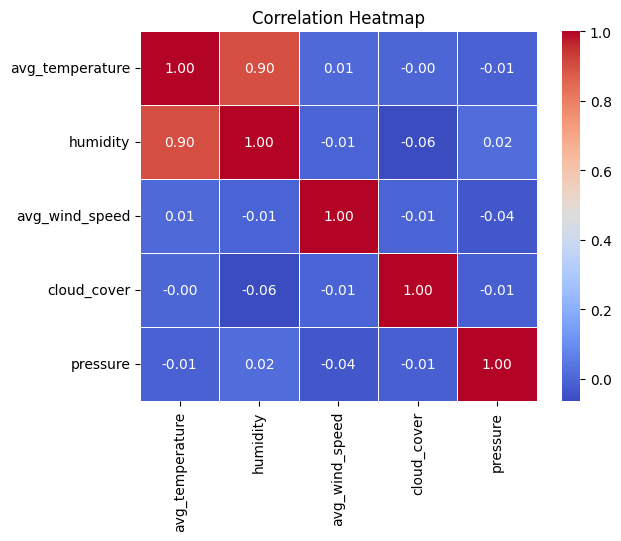

In [127]:

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

We can see that avg temperarure and humadity has strong correlation which is 0.9 and avg-temperature has 0.302974 correlation with y(target) while humadity has   0.330094 correlation.

**so we can drop the avg temperature**

In [128]:
X_scaled = X_scaled.drop(["avg_temperature"],axis=1)

X_scaled

,humidity,avg_wind_speed,cloud_cover,pressure
0,0.269015,0.137475,0.206297,0.424454
1,0.497943,0.093924,0.931916,0.875175
2,0.357744,0.231383,0.113702,0.843847
3,0.385063,0.102838,0.818217,0.176695
4,0.463770,0.215313,0.379252,0.803878
...,...,...,...,...
291,0.129282,0.082379,0.271173,0.033818
292,0.203177,0.141831,0.517381,0.129823
293,0.103425,0.208451,0.296954,0.268974
294,0.079750,0.083297,0.942049,0.975683


##Drawing Boxplots

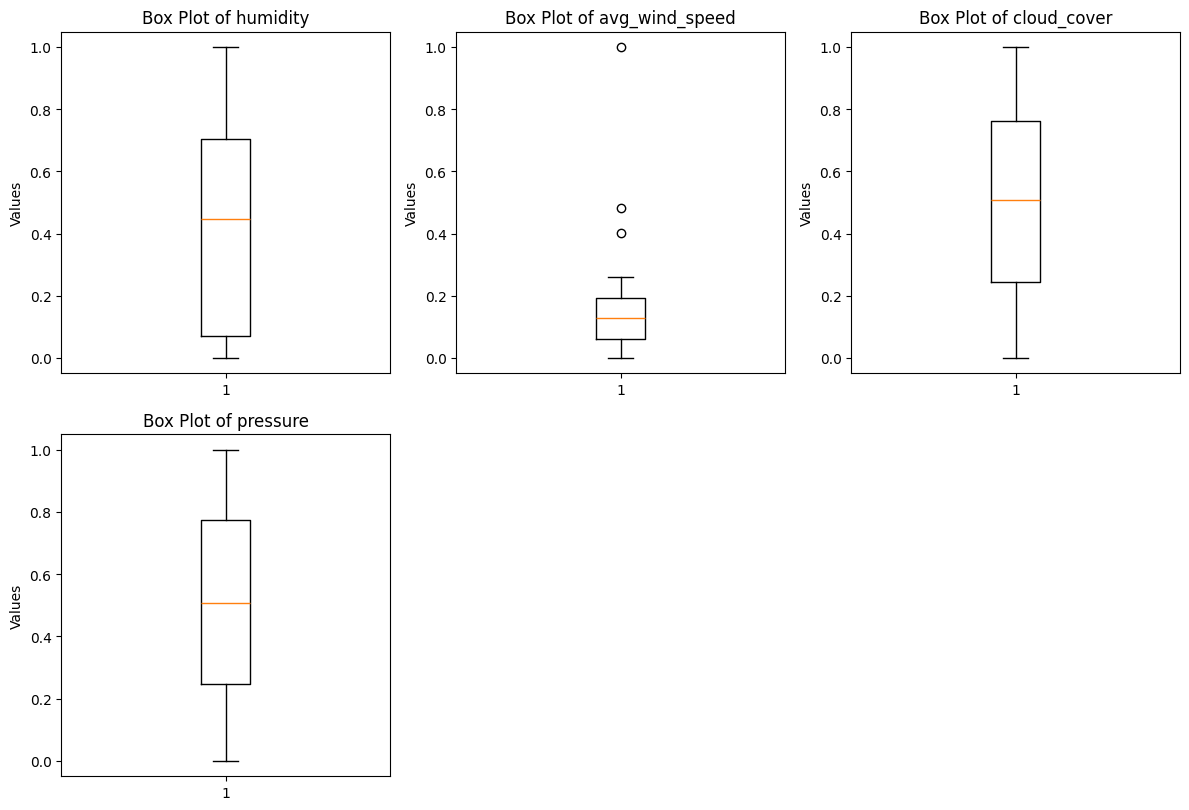

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

for i, col in enumerate(X_scaled.columns):
    plt.subplot(3, 3, i + 1)
    plt.title(f'Box Plot of {col}')
    plt.ylabel('Values')
    plt.boxplot(X_scaled[col])

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


In [130]:
# Reset indices of X_scaled and y
X_scaled = X_scaled.reset_index(drop=True)
y = y.reset_index(drop=True)

print("X_scaled indices:", X_scaled.index)
print("y indices:", y.index)

X_scaled indices: RangeIndex(start=0, stop=296, step=1)
y indices: RangeIndex(start=0, stop=296, step=1)


##removing outliers

In [131]:
def remove_outliers_iqr(df, y):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask = (df[col] >= lower_bound) & (df[col] <= upper_bound)
        df = df[mask]
        y = y[mask]  # Ensure y is filtered using the same index as df
    return df, y


X_cleaned,y =remove_outliers_iqr(X_scaled, y)



##Boxplots after removing ouliers

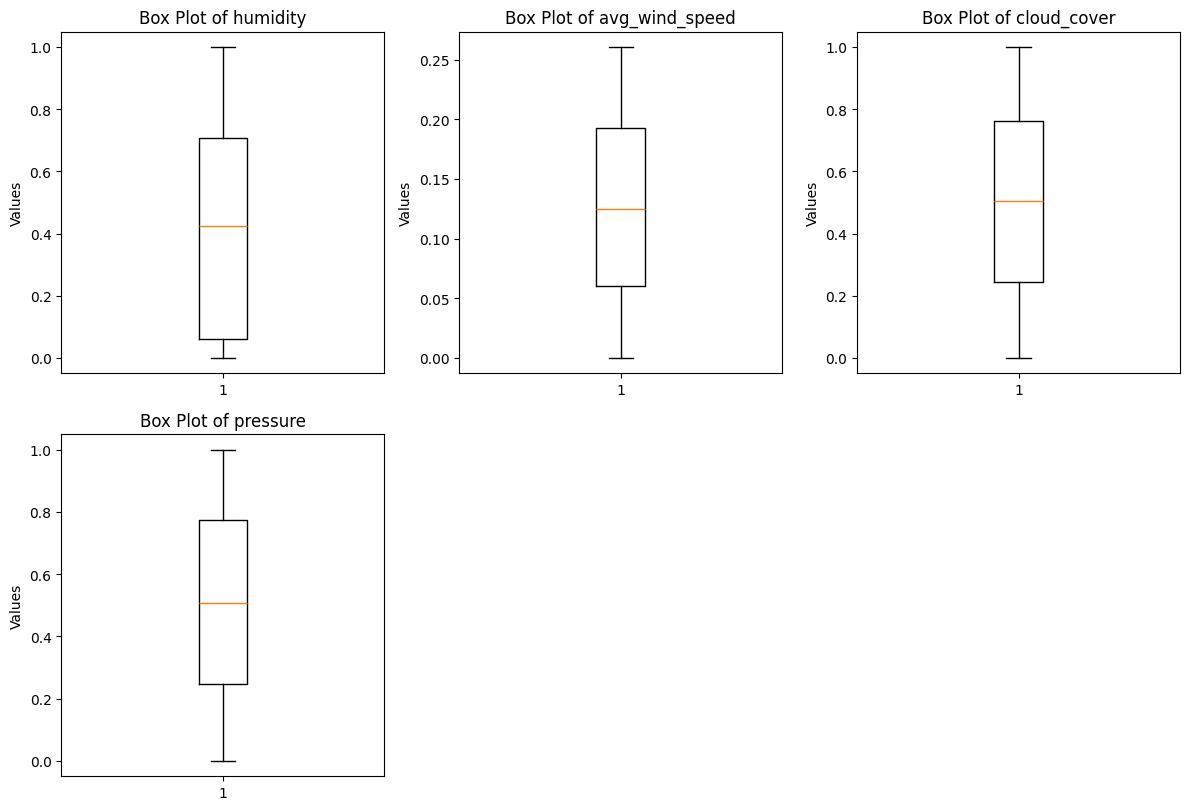

In [132]:

plt.figure(figsize=(12, 12))

for i, col in enumerate(X_cleaned.columns):
    plt.subplot(3, 3, i + 1)
    plt.title(f'Box Plot of {col}')
    plt.ylabel('Values')
    plt.boxplot(X_cleaned[col])

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


##Drawing Scatter plot

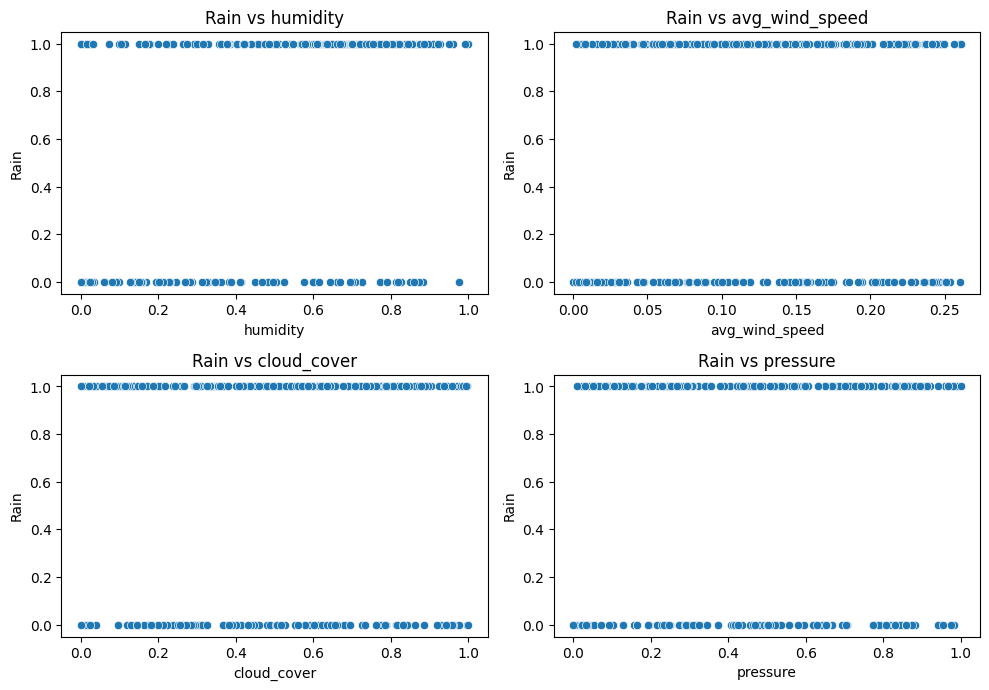

In [133]:
plt.figure(figsize=(10, 10))
for i, feature in enumerate(X_cleaned.columns):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x=X_cleaned[feature], y=y)
    plt.xlabel(feature)
    plt.ylabel('Rain')
    plt.title(f'Rain vs {feature}')

plt.tight_layout()
plt.show()

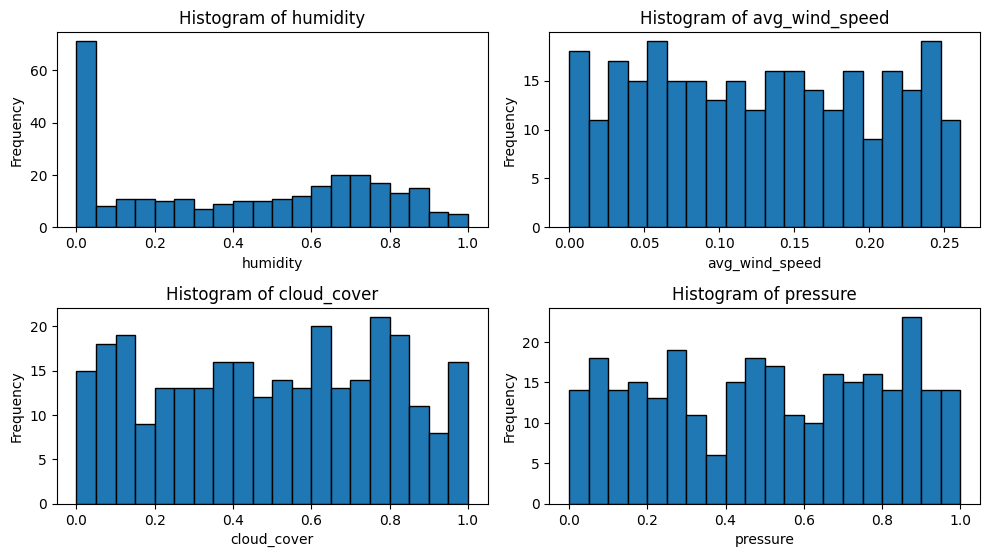

In [134]:
# Define number of features
num_features = len(X_cleaned.columns)

# Set up figure size
plt.figure(figsize=(10, 8))

# Loop through each feature
for i, feature in enumerate(X_cleaned.columns):
    plt.subplot((num_features // 2) + 1, 2, i + 1)  # Dynamically adjust subplot layout
    plt.hist(X_cleaned[feature], bins=20, edgecolor='black')
    plt.title(f'Histogram of {feature}')  # Set unique title per feature
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Show all plots once at the end
plt.tight_layout()
plt.show()

# Split the data set to training and testing

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)


#Logistic reg model

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

##define the parametr grid

In [137]:
param_grid = {
    'penalty': [ 'l2','l1'],  # Regularization type
    'C': [0.01, 0.1,1],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Solvers that support L1 and L2
}

##training

In [138]:
lr_model = LogisticRegression(random_state=0)

grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

lr_best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


##Make Predictions and Evaluate

In [139]:
from sklearn.metrics import log_loss, accuracy_score

# Make predictions on the test set
y_pred = lr_best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

y_pred_proba = lr_best_model.predict_proba(X_test)  # Get probability predictions

# Calculate Log Loss
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss:.4f}")

Accuracy: 0.6949
Log Loss: 0.5875


##adjusting parameters manually

In [140]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0,
                         penalty='l2',           # L2 regularization
                         C=0.1,
                         solver='liblinear',

                         ).fit(X_train, y_train)
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

##measuring accuracy and loss

In [141]:
from sklearn.metrics import log_loss, accuracy_score

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)  # Get probability predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Log Loss
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss:.4f}")


Accuracy: 0.7288
Log Loss: 0.5944


#Importing decision tree

In [142]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss

In [143]:
param_grid = {
    'max_depth': [3,5,6, 7,10, None],  # Test different depths
    'min_samples_split': [2,3, 4,5,7, 10,11],  # Test different min_samples_split values
    'criterion': ['gini', 'entropy']  # Test different splitting criteria
}

In [144]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [145]:
DecisionTreeClassifier_params={"max_depth":40,"min_split":12}

In [146]:
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

dt_best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 7}


In [147]:
# Make predictions on the test set
y_pred = dt_best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate predicted probabilities for log loss
y_pred_proba = dt_best_model.predict_proba(X_test)

# Calculate log loss
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss:.4f}")

Accuracy: 0.7119
Log Loss: 3.5250


##manual adjusting deccsion tree parameters

In [148]:
# Initialize the Decision Tree model with manual hyperparameters
dt_manual_model = DecisionTreeClassifier(
    random_state=0,
    max_depth=5,  # Maximum depth of the tree
    min_samples_split=4,  # Minimum number of samples required to split a node
    criterion= 'gini'
)

# Train the model
dt_manual_model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=0)

In [149]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = dt_manual_model.predict(X_test)

#getting probanilities of each label

y_pred_proba=dt_manual_model.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate log loss
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss:.4f}")

Accuracy: 0.6949
Log Loss: 1.2606


#Random forest

##model load

In [150]:
from sklearn.ensemble import RandomForestClassifier

##training

In [151]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=0)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': list(range(1,30,5)),
    'min_samples_split': list(range(2,10,2)),
    'max_features': ['sqrt', 'log2', None]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
rf_best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 1, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 200}


##loss and accuracy

In [152]:

# Calculate predicted probabilities for log loss
y_pred_proba = rf_best_model.predict_proba(X_test)

# Make predictions on the test set
y_pred = rf_best_model.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Log Loss
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss:.4f}")


Accuracy: 0.6271
Log Loss: 0.5914


##manual adjusting the parameters(random forest)

In [153]:
rf_manual_model = RandomForestClassifier(
    random_state=0,
    n_estimators= 200,
    max_depth=1,
    min_samples_split= 6,
    max_features = 'log2'
    )

rf_manual_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=1, max_features='log2', min_samples_split=6,
                       n_estimators=200, random_state=0)

In [154]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = rf_manual_model.predict(X_test)

y_pred_proba=rf_manual_model.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Log Loss
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss:.4f}")



Accuracy: 0.7288
Log Loss: 0.5834


#Gradient boosting

##model import

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

##model training with Grid searchCV(gradient boosting)

In [156]:
gb_model = GradientBoostingClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50,75, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7,10],
    'min_samples_split': [2, 5,8, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
gb_best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = gb_best_model.predict(X_test)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 75}


##loss and accuracy

In [157]:

# Calculate predicted probabilities for log loss
y_pred_proba = gb_best_model.predict_proba(X_test)

# Make predictions on the test set
y_pred = gb_best_model.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Log Loss
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss:.4f}")


Accuracy: 0.6949
Log Loss: 0.5903


##manual adjusting the parameters

In [158]:
model = GradientBoostingClassifier(
    random_state=42,
    n_estimators=50,
    learning_rate=0.01,
    max_depth=7,
    min_samples_split=10,
    max_features='sqrt'
)


In [159]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Get probability predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Log Loss
loss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {loss:.4f}")

Accuracy: 0.7458
Log Loss: 0.5938
